# Tutorial on GraphNN

We try to build a GraphNN that recognize if an image contains a rectangle or a circle, representing the image as a point cloud

## Import useful stuff

In [349]:
import numpy as np
from math import *
from matplotlib import pyplot as plt 
#device_name = tf.test.gpu_device_name()
#print(device_name)

# Load the dataset

In [350]:
# load one file
import h5py
f = h5py.File("data/ShapeClassifier_Circle0.9_Noise0.7.h5", "r")
#f = h5py.File("data/ShapeClassifier_Circle0.9_Rectangle0.7.h5", "r")
X_train = np.array(f.get("X_train"))
X_test = np.array(f.get("X_test"))
Y_train = np.array(f.get("Y_train"))
Y_test = np.array(f.get("Y_test"))
A_train = np.array(f.get("A_train"))
A_test = np.array(f.get("A_test"))
f.close()    

In [351]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)
print(A_train.shape, A_test.shape)

(700, 100, 3) (300, 100, 3)
(700,) (300,)
(700, 100, 100) (300, 100, 100)


In [352]:
#replace with mine
#!git submodule add https://github.com/vermaMachineLearning/keras-deep-graph-learning.git

In [353]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), 'keras-deep-graph-learning'))

# Now we define the Classifier
We use an implementation of Graph Convolutional Layers, distributed with
https://vermamachinelearning.github.io/keras-deep-graph-learning/

In [371]:
import tensorflow.keras.backend as K
from keras_dgl.layers import MultiGraphCNN
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Dropout,Flatten,Reshape
from tensorflow.keras.models import Model, Sequential
    
NUM_FILTERS = 1
graph_conv_filters = A_train 
graph_conv_filters = K.constant(graph_conv_filters)
    
X_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
graph_conv_filters_input = Input(shape=(graph_conv_filters.shape[1], graph_conv_filters.shape[2]))
    
hidden =  MultiGraphCNN(2, NUM_FILTERS, activation='relu', kernel_initializer='random_normal')([X_input,graph_conv_filters_input])
hidden = Dropout(0.4)(hidden)
hidden =  MultiGraphCNN(1, NUM_FILTERS, activation='relu', kernel_initializer='random_normal')([hidden,graph_conv_filters_input])
hidden = Dropout(0.4)(hidden)
hidden = Flatten()(hidden)
output = Dense(1, activation='sigmoid', kernel_initializer='random_normal')(hidden)
loss="binary_crossentropy"
model = Model(inputs=[X_input,graph_conv_filters_input], outputs=output)
model.compile(loss=loss, optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model_61"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_123 (InputLayer)          [(None, 100, 3)]     0                                            
__________________________________________________________________________________________________
input_124 (InputLayer)          [(None, 100, 100)]   0                                            
__________________________________________________________________________________________________
multi_graph_cnn_158 (MultiGraph (None, 100, 2)       8           input_123[0][0]                  
                                                                 input_124[0][0]                  
__________________________________________________________________________________________________
dropout_223 (Dropout)           (None, 100, 2)       0           multi_graph_cnn_158[0][0] 

In [372]:
history = model.fit([X_train, graph_conv_filters],Y_train,validation_split=0.3, epochs=200, verbose=1)

Epoch 1/200
16/16 [==============================] - 1s 12ms/step - loss: 0.6923 - accuracy: 0.5266 - val_loss: 0.6922 - val_accuracy: 0.5166
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.4830 - val_loss: 0.6923 - val_accuracy: 0.5308
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5588 - val_loss: 0.6920 - val_accuracy: 0.5261
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5407 - val_loss: 0.6918 - val_accuracy: 0.5071
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.5572 - val_loss: 0.6912 - val_accuracy: 0.5071
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.4782 - val_loss: 0.6910 - val_accuracy: 0.5071
Epoch 7/200
16/16 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5133 - val_loss: 0.6902 - val_accuracy: 0.5071
Epoch 8/200


Epoch 59/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6259 - accuracy: 0.6778 - val_loss: 0.6240 - val_accuracy: 0.6445
Epoch 60/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6263 - accuracy: 0.6649 - val_loss: 0.6410 - val_accuracy: 0.6209
Epoch 61/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6284 - accuracy: 0.6866 - val_loss: 0.6247 - val_accuracy: 0.6635
Epoch 62/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6375 - accuracy: 0.6022 - val_loss: 0.6347 - val_accuracy: 0.6493
Epoch 63/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6409 - accuracy: 0.5945 - val_loss: 0.6250 - val_accuracy: 0.6730
Epoch 64/200
16/16 [==============================] - 0s 9ms/step - loss: 0.6340 - accuracy: 0.6174 - val_loss: 0.6220 - val_accuracy: 0.6635
Epoch 65/200
16/16 [==============================] - 0s 4ms/step - loss: 0.6389 - accuracy: 0.6516 - val_loss: 0.6214 - val_accuracy: 0.6540
Epoch 

16/16 [==============================] - 0s 4ms/step - loss: 0.5517 - accuracy: 0.6885 - val_loss: 0.5257 - val_accuracy: 0.8104
Epoch 117/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5712 - accuracy: 0.6914 - val_loss: 0.5108 - val_accuracy: 0.7725
Epoch 118/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5521 - accuracy: 0.7344 - val_loss: 0.5259 - val_accuracy: 0.8294
Epoch 119/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5799 - accuracy: 0.6921 - val_loss: 0.5463 - val_accuracy: 0.8626
Epoch 120/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5862 - accuracy: 0.7318 - val_loss: 0.5033 - val_accuracy: 0.7583
Epoch 121/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5411 - accuracy: 0.7162 - val_loss: 0.5075 - val_accuracy: 0.7867
Epoch 122/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5590 - accuracy: 0.7217 - val_loss: 0.5021 - val_accuracy: 0.7820
Epoch 123/200

16/16 [==============================] - 0s 5ms/step - loss: 0.4904 - accuracy: 0.8042 - val_loss: 0.4595 - val_accuracy: 0.8626
Epoch 174/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5312 - accuracy: 0.6982 - val_loss: 0.4833 - val_accuracy: 0.8578
Epoch 175/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5579 - accuracy: 0.7596 - val_loss: 0.4621 - val_accuracy: 0.8720
Epoch 176/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5396 - accuracy: 0.7409 - val_loss: 0.5151 - val_accuracy: 0.8720
Epoch 177/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5155 - accuracy: 0.7645 - val_loss: 0.4590 - val_accuracy: 0.8673
Epoch 178/200
16/16 [==============================] - 0s 5ms/step - loss: 0.5208 - accuracy: 0.7489 - val_loss: 0.4709 - val_accuracy: 0.8863
Epoch 179/200
16/16 [==============================] - 0s 4ms/step - loss: 0.5352 - accuracy: 0.7503 - val_loss: 0.4574 - val_accuracy: 0.8626
Epoch 180/200

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


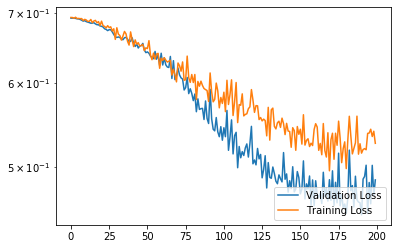

In [373]:
print(history.history.keys())
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.yscale('log')
plt.legend(loc='lower right')
plt.show()

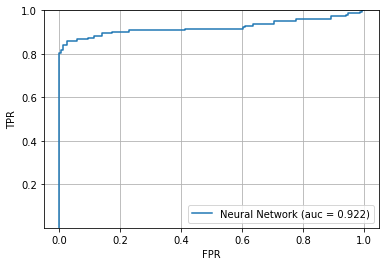

In [374]:
from sklearn.metrics import roc_curve, auc

graph_conv_filters = A_test 
graph_conv_filters = K.constant(graph_conv_filters)
Y_pred = model.predict([X_test, graph_conv_filters])

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(Y_test, Y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, label='Neural Network (auc = %0.3f)' % auc_keras)
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.ylim(0.001,1)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()